In [1]:
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

from fals.utils.load import load_data_fig_4A, load_data_fig_4A_supp, load_data_fig_5A, load_data_fig_5C, load_data_fig_5E, load_data_fig_5F

/Users/tommaso/insitro/fALS_pub2024/.pixi/envs/default/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/tommaso/insitro/fALS_pub2024/.pixi/envs/default/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/tommaso/insitro/fALS_pub2024/.pixi/envs/default/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Users/tommaso/insitro/fALS_pub2024/.pixi/envs/default/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/Users/tommaso/insitro/fAL

In [2]:
plt.rcParams["font.family"] = "Arial"

# Fig. 4.A

Correlation between predicted and actual TDP-43 C/N values derived from morphology embeddings (DAPI and TUJ1). Each point is an individual TARDBP(G295S) cell from the same well.

In [3]:
y_test, y_test_pred, corr = load_data_fig_4A()

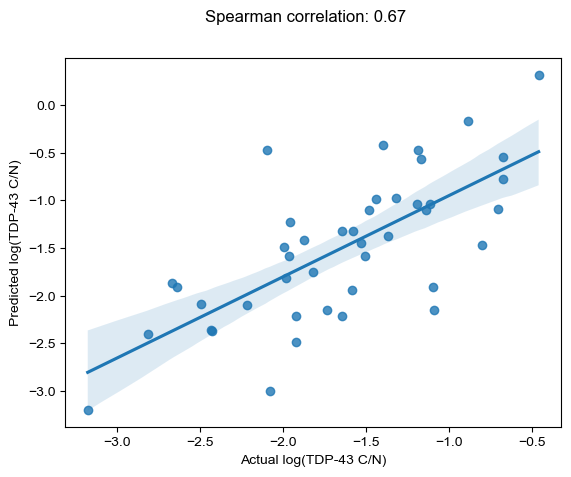

In [4]:
sns.regplot(x=y_test, y=y_test_pred)

plt.suptitle(f'Spearman correlation: {corr:.2f}')
_ = plt.xlabel('Actual log(TDP-43 C/N)')
_ = plt.ylabel('Predicted log(TDP-43 C/N)')

# Fig. 5.A

Accuracy of linear classifiers differentiating mutant from WT cells within each donor mutant pair. The
plot reports the performance of a model trained on well density only (black); DAPI (light green); DAPI and
TUJ1 (dark green); and DAPI, TDP-43, STMN2, and TUJ1 (blue).

In [5]:
results_in_donor = load_data_fig_5A()

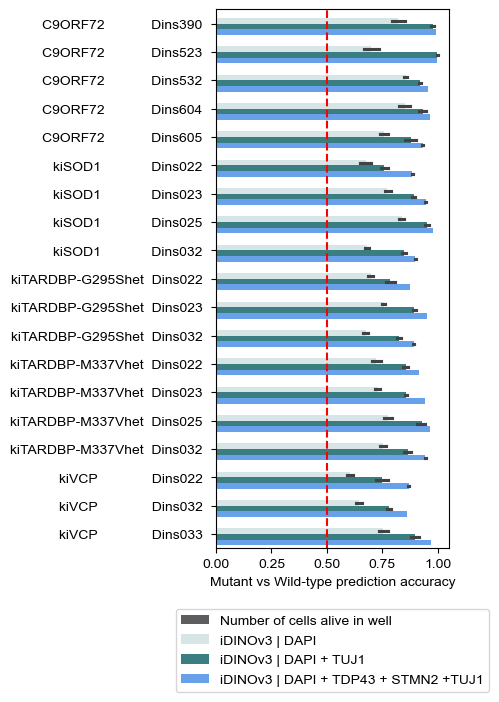

In [6]:
f = plt.figure(figsize=(3, 7))
ax = sns.barplot(
    data=results_in_donor,
    y='test_and_edit',
    x='acc_test',
    hue='feature_name',
    palette={
        'Number of cells alive in well': '#5d5d5f',
        'iDINOv3 | DAPI': '#d5e7e8',
         'iDINOv3 | DAPI + TUJ1': '#2e898d', 
         "iDINOv3 | DAPI + TDP43 + STMN2 +TUJ1": "#529fff",
    },
    hue_order=['Number of cells alive in well', "iDINOv3 | DAPI", "iDINOv3 | DAPI + TUJ1","iDINOv3 | DAPI + TDP43 + STMN2 +TUJ1"],
)
ax.set_ylabel(None)
ax.set_xlabel("Mutant vs Wild-type prediction accuracy")

plt.axvline(x=0.5, color='red', linestyle='--')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center')

# Fig. 5.C

Mean accuracy of linear classifiers differentiating mutant from WT from the donor hold-out regime for
each mutant class. The plot reports the performance of a model trained on well density only (black); DAPI
(light green); DAPI and TUJ1 (dark green); and all channels DAPI, TDP-43, STMN2, and TUJ1 (blue).
D. Representative image tiles from extremes of the VCP DMSO-treated classifier with all channels. DAPI
(blue), TDP-43 (green), and TUJ1 (red)

In [7]:
results_cross_donor = load_data_fig_5C()

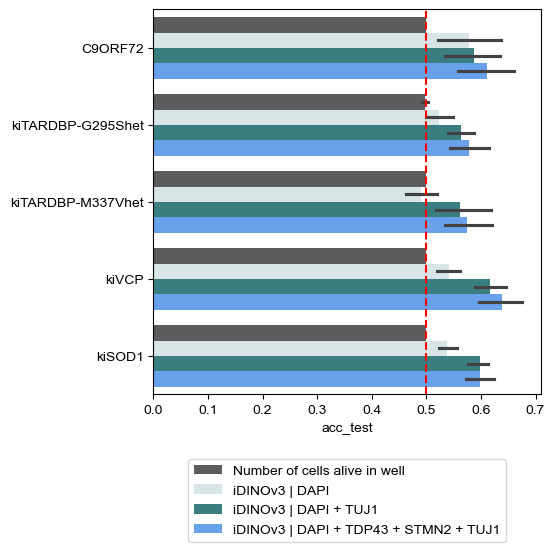

In [8]:
f = plt.figure(figsize=(5, 5))
ax = sns.barplot(
    data=results_cross_donor,
    x='acc_test',
    y='gene',
    hue='cont_vars_pretty',
    palette={
        'Number of cells alive in well': '#5d5d5f',
        'iDINOv3 | DAPI': '#d5e7e8',
         'iDINOv3 | DAPI + TUJ1': '#2e898d', 
         "iDINOv3 | DAPI + TDP43 + STMN2 + TUJ1": "#529fff",
    },
    hue_order=['Number of cells alive in well', "iDINOv3 | DAPI", "iDINOv3 | DAPI + TUJ1","iDINOv3 | DAPI + TDP43 + STMN2 + TUJ1"],
)

plt.axvline(x=0.5, color='red', linestyle='--')
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center')
_ = ax.set_ylabel(None)

# Fig. 5.E

Cross-donor mutant/WT classifier accuracy on linear classifiers trained using single-feature TDP-43
mislocalization ratio (black), or all channels (blue).

In [9]:
results = load_data_fig_5E()

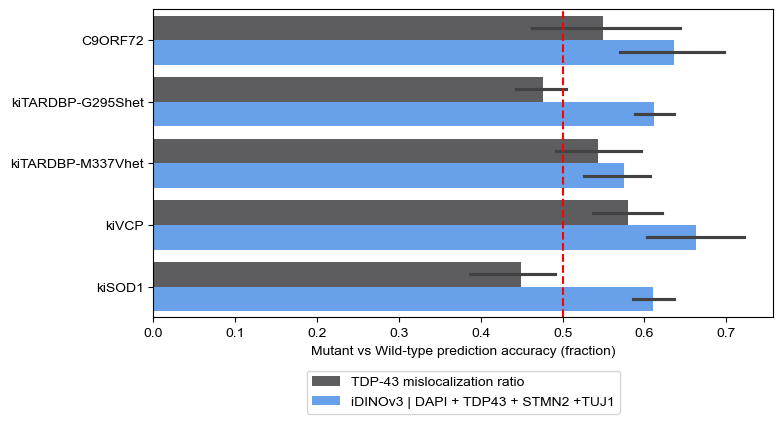

In [10]:
# Plot accuracy comparison
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(
    data=results.query('compound_name == "Dimethyl sulfoxide [MilliporeSigma]"'),
    x='acc_test',
    y='gene',
    hue='model',
    palette={
        'TDP-43 mislocalization ratio': '#5d5d5f',
        "iDINOv3 | DAPI + TDP43 + STMN2 +TUJ1": "#529fff",
    },
    ax=ax
)
ax.axvline(0.5, color='red', linestyle='--')
ax.set_xlabel('Mutant vs Wild-type prediction accuracy (fraction)')
ax.set_ylabel(None)
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center')

# Fig. 5.F

Power analysis of a simulated phenotypic reversion screen for the C9ORF72 mutant. The t-statistic is
the predicted number of disease cells between groups as a function of the number of cells subsampled,
for a simulated dataset composed of 10% mutant and 90% WT cells (group 1) and pure mutant cells
(group 2). The red dotted line denotes the significance level, set at five standard deviations.

In [11]:
results_power_analysis = load_data_fig_5F()

/Users/tommaso/insitro/fALS_pub2024/src/fals/utils/load.py:306: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_sub["predicted_label_binary"] = labels_sub["predicted_label"].map(


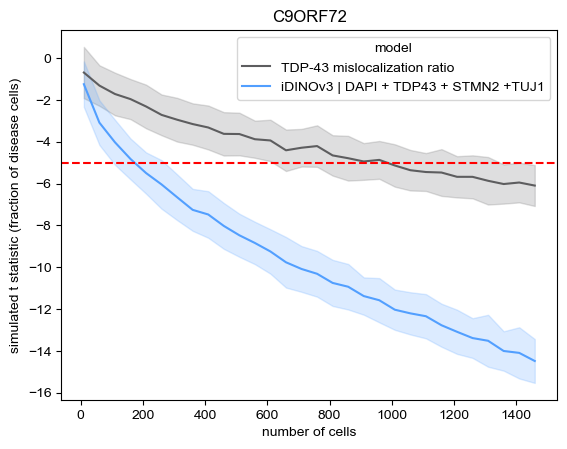

In [12]:
fig, ax = plt.subplots()
sns.lineplot(
    data=results_power_analysis.reset_index(),
    x='sample_size',
    y='mixture_vs_p1_t_statistic',
    hue='model',
    errorbar='sd',
    palette={
        'TDP-43 mislocalization ratio': '#5d5d5f',
        "iDINOv3 | DAPI + TDP43 + STMN2 +TUJ1": "#529fff",
    },
    ax=ax,
)
ax.set_xlabel('number of cells')
ax.set_ylabel('simulated t statistic (fraction of disease cells)')
ax.axhline(-5,
           linestyle='--',
           color='red')
_ = ax.set_title('C9ORF72')

# Fig 4.A (supp.)

Density histogram of the TDP-43 localization as predicted from DAPI and TUJ1 fluorescence channel embedding, compared to the C/N mask intensity computed from the TDP-43 channel.

In [13]:
df = load_data_fig_4A_supp()

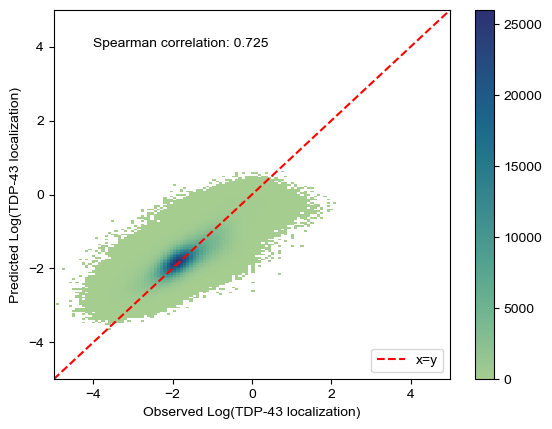

In [14]:
plt.plot([-5, 5], [-5, 5], color='red', linestyle='--')
plt.legend(["x=y"],loc='lower right')

ax = sns.histplot(x=df['y_test'], y=df['y_pred_test'], bins=100, pthresh=.0001, cmap="crest", cbar=True)

ax.set_ylim(-5, 5)
ax.set_xlabel("Observed Log(TDP-43 localization)")
ax.set_ylabel("Predicted Log(TDP-43 localization)")
ax.set_xlim(-5, 5)
_ = ax.text(-4, 4, f"Spearman correlation: {spearmanr(df['y_test'], df['y_pred_test']).statistic:.3f}")